# Computing model residuals

This notebook computes the residuals between data and a model fitted to this data, and makes a statistical analysis of residuals. This notebook builds upon tools developed earlier in this class.

#### First, import useful libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#### Plotting options

In [8]:
%matplotlib inline
plt.style.use("..\class14\\astr19-matplotlib-defaults.txt")

#### Define a model

In [9]:
#reference function to create data, and make the fit
#first argument is the variable x
#other arguments are parameters: amplitude, frequency, and phase
def sinusoid(x,A,f,p):
    return A*np.sin(2.0*np.pi*f*x+p)

In [10]:
#function that will generate some data
def generate_data(xmin=0.0,xmax=10.0,A=1.0,f=0.5,p=1.0,s=0.25,n=100):
    #xmin is the minimum range of the data
    #xmax is the maximum range of the data
    #A is the Amplitude
    #f is the frequency
    #p is the phase
    #s is the gaussian stdev
    #n is the number of samples

    #create n points randomly (uniformly) distributed between xmin and xmax
    x = np.random.uniform(low=xmin,high=xmax,size=n)
    x = np.asarray(x,dtype=np.float32) #convert to a float
    
    #y have a value centered on the real curve, but with gaussian error
    y = sinusoid(x,A,f,p) + s*np.random.randn(n)
    y = np.asarray(y,dtype=np.float32)

    y_err = np.full(n,s,dtype=np.float32)

    #return x, y, and y_err values
    return x,y,y_err

#### Generate the data

In [11]:
x, y, y_err = generate_data()

#### Make the fit

In [12]:
params,pcov = optimize.curve_fit(sinusoid,x,y,sigma=y_err,p0=[1,0.5,1])
A_fit = params[0]
f_fit = params[1]
p_fit = params[2]
print(A_fit,f_fit,p_fit)

0.9675162292219726 0.5011411930616931 0.9276343058244529


#### Plot the data and the model

In [13]:
x_fit = np.linspace(0,10,1000)
y_fit = sinusoid(x_fit,A_fit,f_fit,p_fit)

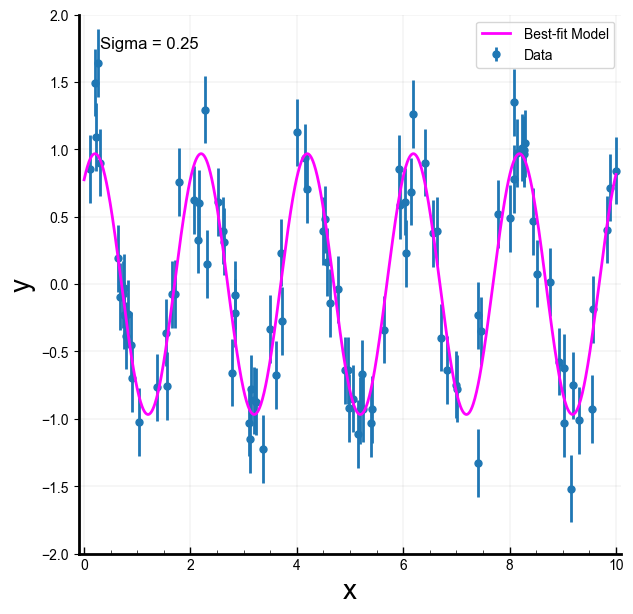

In [14]:
f,ax = plt.subplots(1,1,figsize=(7,7))
ax.errorbar(x,y,y_err,fmt='o',zorder=5,label='Data')
ax.plot(x_fit,y_fit,color='magenta',zorder=6,label='Best-fit Model')
ax.set_xlim([-0.1,10.1])
ax.set_ylim([-2.,2.])
ax.text(0.3,1.75,f"Sigma = {0.25}",color='0',fontsize=12)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

Now let's have a look at residuals between data and model

In [15]:
# sort the data by increasing x
idx_model = np.argsort(x)
x_data = x[idx_model]
y_data = y[idx_model]
y_model = sinusoid(x_data, A_fit, f_fit, p_fit)

#compute residuals
residuals = y_data - y_model

Plot the residuals

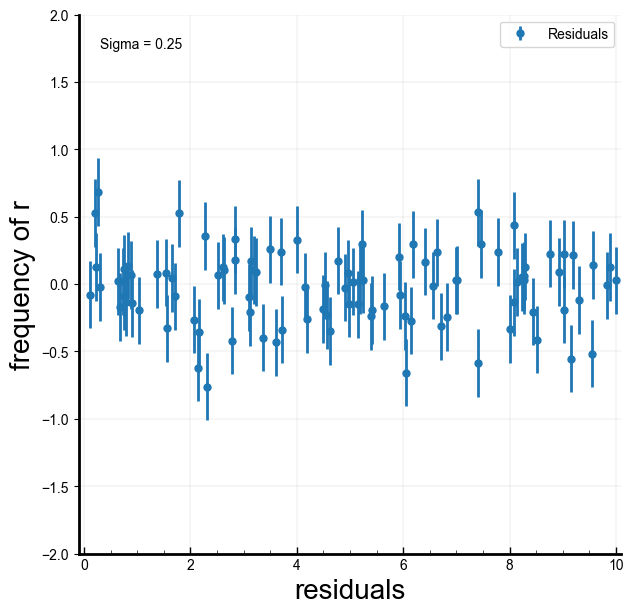

In [25]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.errorbar(x_data, residuals, y_err, fmt='o', label='Residuals')
ax.set_xlim([-.1, 10.1])
ax.set_ylim(-2, 2)
ax.text(0.3, 1.75, f"Sigma = {0.25}", color='0', fontsize=12)
ax.set_xlabel('residuals', fontsize=20)
ax.set_ylabel('frequency of r', fontsize=20)

plt.legend(frameon=True, fontsize=10, handletextpad=1)
plt.show()

What are the statistical properties of residuals?

In [18]:
residual_mean = np.mean(residuals) #should go to zero (better fit)
residual_std = np.std(residuals) #should recover error coming from the data

print(f'Mean residual is {residual_mean}')
print(f'RMS residual is {residual_std}')

Mean residual is -0.0276961550116539
RMS residual is 0.27080395817756653


Define a gaussian

In [23]:
def gaussian(x, mu, s):
    return 1.0 / np.sqrt(2.0*np.pi*s**2) * np.exp(-.5 * ((x - mu)/s)**2)

Histogram the residuals

Text(0, 0.5, 'frequency of r')

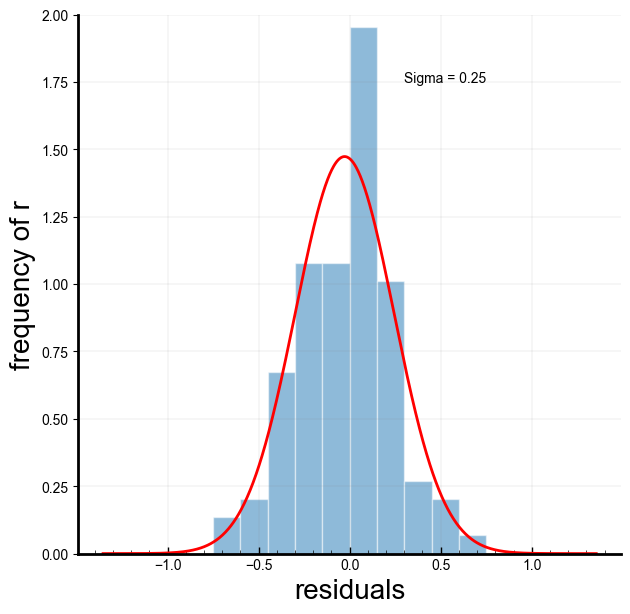

In [28]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.hist(residuals, bins=10, range=(-0.75, 0.75), alpha=0.5, edgecolor='white', density=True)

#add the gaussian distribution
x_g = np.linspace(-5*residual_std, 5*residual_std, 1000)
ax.plot(x_g, gaussian(x_g, residual_mean, residual_std), color='red')

ax.set_ylim(0, 2)
ax.text(0.3, 1.75, f"Sigma = {0.25}")
ax.set_xlabel('residuals', fontsize=20)
ax.set_ylabel('frequency of r', fontsize=20)

Add an outlier to the data

In [32]:
#initial properties of the dataset
xmin = 0
xmax = 10
A = 1
f = 0.5
p = 1
s= 0.25

#generating a random outlier location and value
x_out = np.random.uniform(low=xmin, high=xmax)
y_out = sinusoid(x_out, A, f, p) + 7*s

#adding outlier to the data
x_new = np.append(x, x_out)
y_new = np.append(y, y_out)
y_err_new = np.append(y_err, s)

Recompute the model including the new data location

In [33]:
#sort the data by increasing x
idx_model_new = np.argsort(x_new)
x_data_new = x_new[idx_model_new]
y_data_new = y_new[idx_model_new]
y_model_new = sinusoid(x_data_new, A_fit, f_fit, p_fit)

#compute residuals
residuals_new = y_data_new - y_model_new

Plot the data, including the outlier

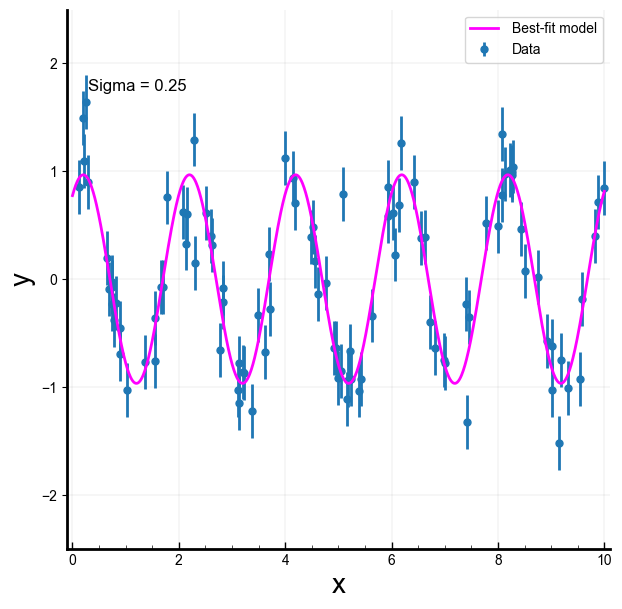

In [36]:
f, ax = plt.subplots(1,1, figsize=(7,7))
ax.errorbar(x_data_new, y_data_new, y_err_new, zorder=5, fmt='o', label='Data')
ax.plot(x_fit, y_fit, color='magenta', zorder = 6, label='Best-fit model')
ax.set_xlim([-.1, 10.1])
ax.set_ylim(-2.5, 2.5)
ax.text(0.3, 1.75, f"Sigma = {0.25}", color='0', fontsize=12)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

plt.legend(frameon=True, fontsize=10, handletextpad=1)
plt.show()

Plot the residuals, including the outlier

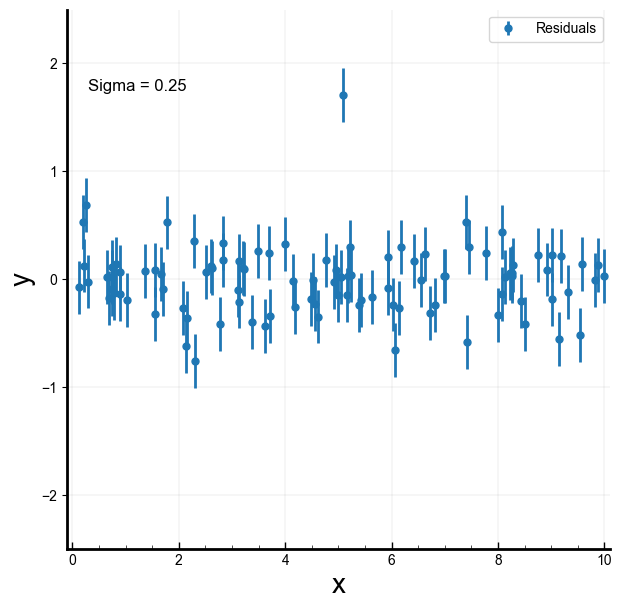

In [37]:
f, ax = plt.subplots(1,1, figsize=(7,7))
ax.errorbar(x_data_new, residuals_new, y_err_new, zorder=5, fmt='o', label='Residuals')
ax.set_xlim([-.1, 10.1])
ax.set_ylim(-2.5, 2.5)
ax.text(0.3, 1.75, f"Sigma = {0.25}", color='0', fontsize=12)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

plt.legend(frameon=True, fontsize=10, handletextpad=1)
plt.show()

#### Histogram the resdiuals, including the outlier

Text(0, 0.5, 'frequency of r')

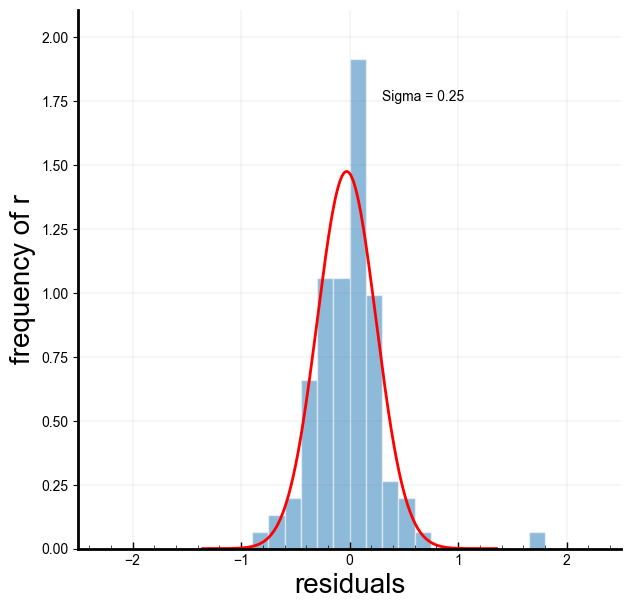

In [40]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.hist(residuals_new, bins=30, range=(-2.25, 2.25), alpha=0.5, edgecolor='white', density=True)

#add the gaussian distribution
x_g = np.linspace(-5*residual_std, 5*residual_std, 1000)
ax.plot(x_g, gaussian(x_g, residual_mean, residual_std), color='red')

ax.set_xlim(-2.5, 2.5)
ax.text(0.3, 1.75, f"Sigma = {0.25}")
ax.set_xlabel('residuals', fontsize=20)
ax.set_ylabel('frequency of r', fontsize=20)